# Управление колесным роботом
## Введение
Для экономии времени и материальных ресурсов перед проведением полунатурных и натурных испытаний систем навигации и управления применяют методы иммитационного моделирования. Такой подход позволяет обнаружить ошибки в алгоритмах навигации и управления без повреждений аппаратного обеспечения. В данной лабораторной работе мы рассмотрим иммитационное моделирование движения двухколесного робота и Вам будет необходимо разработать простейшую систему управления им.
## Теоретическая часть
Математическое моделирование — это процесс создания абстрактной математической структуры, которая описывает реальную систему, явление или процесс. Оно позволяет изучать и предсказывать поведение системы, анализировать ее свойства и принимать обоснованные решения на основе математических вычислений.  
Иммитационное моделирование — это процесс создания модели системы или процесса и последующего воссоздания их поведения на компьютере или другом устройстве.  
Иммитационное моделирование основывается на математической модели системы.  
Само моделирование строется на основе следующей схемы.  

<img src="Схема.png" alt="Схема">

## Математическая модель робота Roko2
В данной лабораторной работе рассматривается математическая модель двухколесного робота Roko2. Модель включает как механические параметры робота, так и методы управления на основе ПД-регуляторов. Для точного описания движения и контроля за ним важно учитывать не только физические характеристики робота, но и возможные погрешности измерений, которые симулируются в данной модели.

## Основные параметры робота

Робот Roko2 моделируется как система с двумя колесами, расположенными на одной оси. Для точного описания динамики движения и управления используются следующие параметры:

- **Масса робота (_mass_)**: 12 кг
- **Радиус колес (_rw_)**: 0.1 м
- **Ширина колесной базы (_lw_)**: 0.5 м
- **Длина робота (_lx_)**: 1.2 м
- **Ширина робота (_ly_)**: 0.6 м
- **Высота робота (_lz_)**: 0.3 м
- **Масса колеса (_mw_)**: 0.3 кг

Эти параметры определяют инерционные характеристики робота и его динамическую реакцию на внешние воздействия.

### Моменты инерции

Моменты инерции робота рассчитываются на основе его геометрии и массы:
- **Момент инерции колеса вокруг оси колеса (_Jw_)**:
  \begin{align}
  Jw = 0.5 \cdot mw \cdot rw^2
  \end{align}
- **Момент инерции колесной системы вокруг вертикальной оси (_Jd_)**:
  \begin{align}
  Jd = 0.25 \cdot mw \cdot rw^2 + \frac{1}{12} \cdot mw \cdot 0.04^2
  \end{align}
- **Момент инерции всего робота вокруг оси X (_Jx_)**:
  \begin{align}
  Jx = 0.25 \cdot mass \cdot ly^2 + \frac{1}{12} \cdot mass \cdot lz^2
  \end{align}
- **Момент инерции всего робота вокруг оси Y (_Jy_)**:
  \begin{align}
  Jy = 0.25 \cdot mass \cdot lx^2 + \frac{1}{12} \cdot mass \cdot lz^2
  \end{align}
- **Момент инерции всего робота вокруг оси Z (_Jz_)**:
  \begin{align}
  Jz = 0.5 \cdot mass \cdot ly^2
  \end{align}

Моменты инерции играют важную роль в описании динамики вращательного движения робота.

## Динамическая модель

Для описания движения робота используются уравнения, которые учитывают как поступательные, так и вращательные компоненты движения.

### Уравнение вращательного движения

Вращательное движение робота описывается угловым ускорением $ \alpha $, которое зависит от разницы моментов, создаваемых левым (_Ml_) и правым (_Mr_) колесами:
\begin{align}
\alpha = \frac{(M_r - M_l) \cdot lw}{rw \cdot (2 \cdot Jd + Jz + 2 \cdot \frac{lw^2 \cdot Jw}{rw^2} + 2 \cdot mw \cdot lw^2)}
\end{align}
Здесь учитываются моменты инерции колес и их взаимное расположение относительно оси вращения.

### Уравнение поступательного движения

Линейное ускорение $ a $ робота зависит от суммы моментов, создаваемых колесами:
\begin{align}
a = \frac{(M_r + M_l) \cdot (Jy + lz^2 \cdot mass - rw \cdot lw \cdot mass)}{2 \cdot \frac{Jw}{rw} \cdot (Jy + lz^2 \cdot mass) + 2 \cdot Jy \cdot rw \cdot (0.5 \cdot mass + mw) + 2 \cdot lz^2 \cdot rw \cdot mass \cdot mw}
\end{align}
Это уравнение описывает, как сила, приложенная колесами, преобразуется в поступательное движение.

## Управление роботом

Для управления вращением колес роботом используется пропорционально-дифференциальный (ПД) регулятор, который корректирует линейную скорость и угловую скорость робота на основе текущих измерений и желаемых значений. Такой подход может использоваться и на более высоком уровне.

### Контроль по линейной скорости

ПД-регулятор для линейной скорости учитывает разницу между желаемой скоростью $ v_{\text{desired}} $ и текущей скоростью робота $ v_{\text{current}} $:
\begin{align}
u_v = K_p \cdot (v_{\text{desired}} - v_{\text{current}}) + K_d \cdot \frac{d}{dt}(v_{\text{desired}} - v_{\text{current}})
\end{align}
Здесь $ K_p $ и $ K_d $ — коэффициенты пропорциональной и дифференциальной составляющих регулятора.

### Контроль по угловой скорости

Аналогично, для контроля угловой скорости используется ПД-регулятор:
\begin{align}
u_{\omega} = K_p \cdot (\omega_{\text{desired}} - \omega_{\text{current}}) + K_d \cdot \frac{d}{dt}(\omega_{\text{desired}} - \omega_{\text{current}})
\end{align}

### Шумы
В реальных условиях робот сталкивается с различными погрешностями измерений, которые учитываются в модели:
- **Гироскопические ошибки**: сдвиг гироскопа и шум.
- **GNSS ошибки**: сдвиги и шумы измерений положения.
- **Ошибки одометрии**: шумы и погрешности, возникающие при измерении скорости.

Эти погрешности моделируются с использованием случайных значений для того, чтобы отразить неопределенность реальных измерений.

## Практическая часть
В следующей ячейке представлено моделирование движения такого робота по случайно сгенерированному лабиринту. Ознакомьтесь с кодом моделирования.  
Моделирование использует матматическую модель приведенную в теории записанную в файле Roko2, генератор лабиринтов в файле maze_generator и основной код моделирования в файле Simulation.  
В данном случае задача робота пройти лабиринт не столкнувшись со стенами. Для прохождения робот оснащен тремя измерителями расстояний (влево, вперед и вправо).
Ваша задача заполнить класс ControlSystem таким образом что бы робот достигал контрольной точки.  

Точка старта робота всегда находится в нижнем левом углу с координатами 1.5, 1.5, целевая точка находится в верхнем правом углу с координатами 9.5, 9.5  
При моделировании рассчет положения и измерений робота происходят каждую 0.1 секунды.  
В состав класса ControlSystem входят три метода:  
**calculate_target_data(x1, y1, x2, y2, heading)** - этому методу передаются следующие данные *x1, y1* - координаты робота, *x2, y2* - координаты целевой точки, *heading* - текущий курс робота. На выходе выдается один объект, формат и тип объекта остается полностью на ваше усмотрение, он без изменений передается методу calculate_control. Данный метод предназначен для рассчета подготовительных данных управления (расстояния до цели, курса на цель и.т.п.)  
**calculate_control(target_data, distances)** - это основной метод этого класса, на его вход передается объект переданный функцией calculate_target_data, и показания сесоров расстояния. На выходе этого метода должны формироваться необходимые линейная (*velocity*) и угловая скорости (*angular_rate*) движения робота.


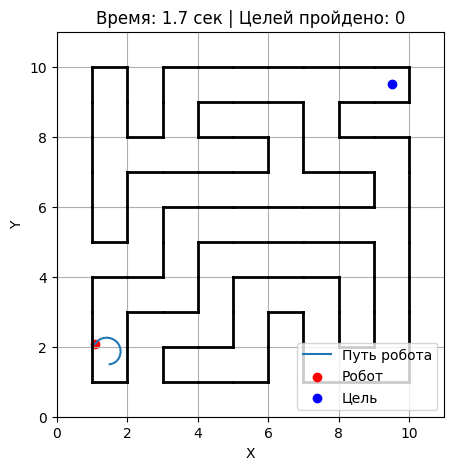

DANGER! COLLISION!!
Simulation stopped due to collision


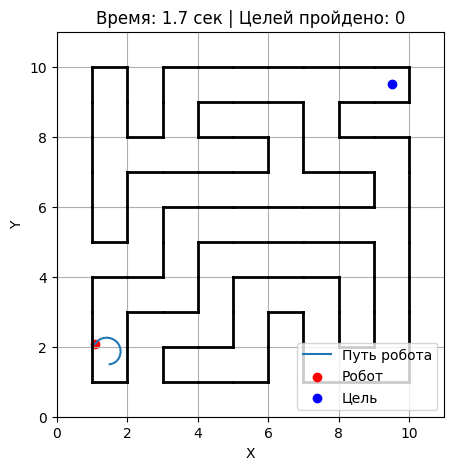

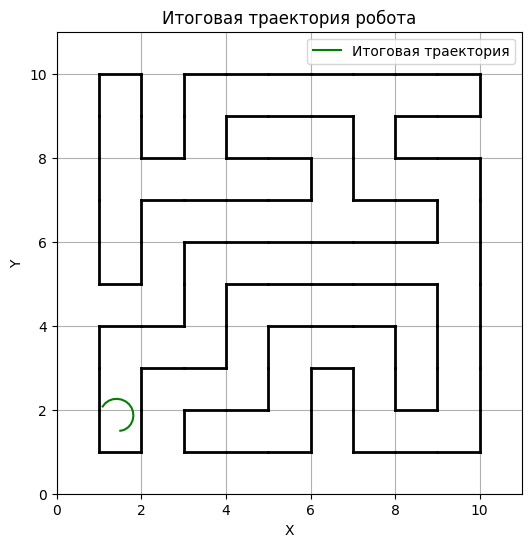

In [6]:
from simulation_runner_jupyter import SimulationRunner

# Пример системы управления
class ControlSystem:
    def __init__(self):
        self.previous_angular_rate = 0

    def calculate_target_data(self, x1, y1, x2, y2, heading):
        distance = 2
        heading_diff = 1
        return [heading_diff, distance]

    def calculate_control(self, target_data, distances):
        left_dist, front_dist, right_dist = distances

        velocity = 1
        angular_rate = 1
        return velocity, angular_rate

# Инициализация системы управления
control_system = ControlSystem()

# Параметры симуляции
trajectory = [[9.5, 9.5]]
sim_time = 200
show_animation = True

# Создание и запуск симуляции
sim_runner = SimulationRunner(control_system, trajectory, sim_time, show_animation)
sim_runner.run_simulation()


Опишите использованные вами законы управления.

Напишите вывод по проделанной работе.